<a href="https://colab.research.google.com/github/lewisjustin749/KMeans-Clustering/blob/main/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This jupyter notebook is prepared by "Justin Lewis".

# 1. Load Data and perform general EDA 
<ol type="I">
<li>import libraries necessary libraries</li>
<li>import the data to a dataframe and show the count of rows and columns (1 pt)</li>
<li>Show the top 5 and last 5 rows (1 pt)</li>
<li>Is there any null values on any column?</li>


<li>Are all the columns numeric such as float or int? If not, please convert them to int before going to the next step.</li>
<li>plot the heatmap with correlations to get some more idea about the data.



In [1]:
#=======================================================================================
# Importing the libaries:
#=======================================================================================

from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

Saving hrdata3.csv to hrdata3.csv


In [2]:
#=======================================================================================
# Importing the data:
#=======================================================================================
def read_data():
  data = pd.read_csv('hrdata3.csv')
  print("csv file imported successfully")
  print("-"*50)
  return data

In [3]:
df = read_data()

csv file imported successfully
--------------------------------------------------


# Discovering the data:

In [4]:
df.head()

,Unnamed: 0,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
0,1,29725,0.776,15,2,5,47,0.0
1,4,666,0.767,21,2,4,8,0.0
2,6,28806,0.920,5,2,1,24,0.0
3,7,402,0.762,13,0,5,18,1.0
4,8,27107,0.920,7,2,1,46,1.0


In [5]:
df.tail()

,Unnamed: 0,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
12972,19149,251,0.920,9,2,1,36,1.0
12973,19150,32313,0.920,10,3,3,23,0.0
12974,19152,29754,0.920,7,1,1,25,0.0
12975,19155,24576,0.920,21,2,4,44,0.0
12976,19156,5756,0.802,0,4,2,97,0.0


In [6]:
#=======================================================================================
# Discovering the features:
#=======================================================================================
print(df.columns.values)

['Unnamed: 0' 'enrollee_id' 'city_development_index' 'experience'
 'company_size' 'last_new_job' 'training_hours' 'target']


In [7]:
#=======================================================================================
# Discovering the features types:
#=======================================================================================
df.info()
print('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12977 entries, 0 to 12976
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              12977 non-null  int64  
 1   enrollee_id             12977 non-null  int64  
 2   city_development_index  12977 non-null  float64
 3   experience              12977 non-null  int64  
 4   company_size            12977 non-null  int64  
 5   last_new_job            12977 non-null  int64  
 6   training_hours          12977 non-null  int64  
 7   target                  12977 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 811.2 KB
--------------------------------------------------


In [8]:
# Unnecessary feature 
df.drop('Unnamed: 0', inplace=True, axis=1)

In [9]:
df.shape

(12977, 7)

In [10]:
#=======================================================================================
# Null value Analysis:
#=======================================================================================
print('Missing data in csv file')
df.isnull().sum()

Missing data in csv file


enrollee_id               0
city_development_index    0
experience                0
company_size              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### Is there any null values on any column?

There are no null values in any column.

In [11]:
#=======================================================================================
# Discovering the numerical data distribution :
#=======================================================================================
df.describe()

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
count,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000
mean,16720.633351,0.836418,10.829468,3.258226,2.226555,65.693304,0.175850
std,9688.964703,0.120019,6.578826,2.189358,1.640415,60.616975,0.380707
min,2.000000,0.448000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8310.000000,0.762000,5.000000,2.000000,1.000000,23.000000,0.000000
50%,16650.000000,0.910000,10.000000,3.000000,1.000000,47.000000,0.000000
75%,25197.000000,0.920000,16.000000,5.000000,4.000000,89.000000,0.000000
max,33380.000000,0.949000,21.000000,7.000000,5.000000,336.000000,1.000000


Insights:
* More than 50% of candidates  in the training program live in a developed city with an metric > 9
* 17.58% of candidates are looking to switch jobs after training.
* Training hours feature has right skewness
* Average candidate has about 11 years of total experience in data science.
* Average candidate had 2 years since there last new job

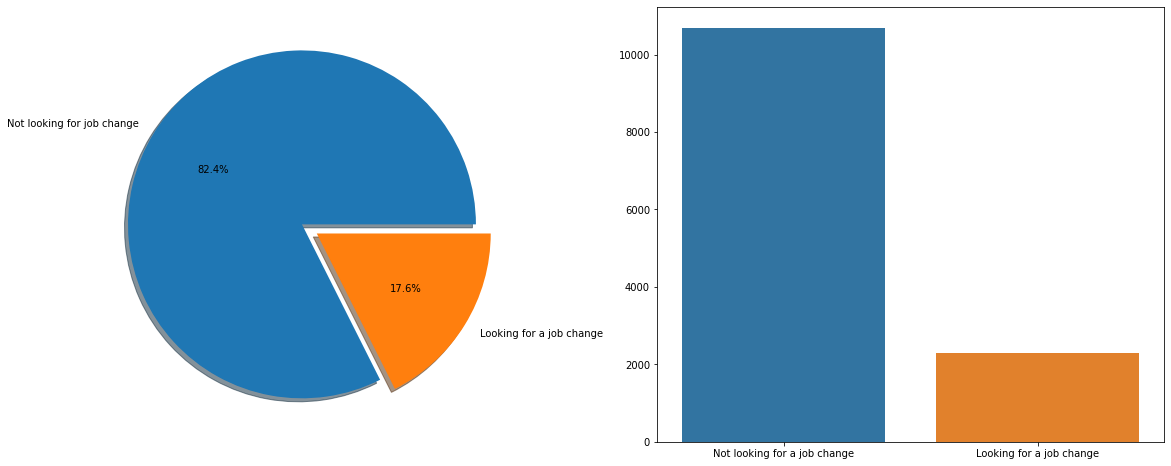

In [12]:
# ===================================================================
# Count of people who changed jobs:
# ===================================================================
f,ax=plt.subplots(1,2,figsize=(20,8))
df['target'].replace({0:'Not looking for job change', 1:'Looking for a job change'}).value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_ylabel('')
sns.countplot(x=  df["target"].replace({0:'Not looking for a job change', 1:'Looking for a job change'}), ax= ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

Insights:

* The data being skewed towards zero relates to the fact candidates invest a lot of time and also has revelant and many years of experience in data science so leaving a data science company after receiving training is highly unlikely 

In [13]:
# Helper functions:
# Bar plot that plots a feature against the target (changing jobs)
# table that displays a feature's mean value (percentage) of changing jobs
# Stacked histplot that plots count of a feature against the target (changing jobs)

def changed_jobs_bar_plot(feature):
  plt.figure(figsize=(10,10))
  sns.barplot(data = df, x = feature, y = "target").set_title(f"{feature} VS Changing jobs")
  plt.show()
def changed_jobs_table(feature):
  return df[[feature, "target"]].groupby([feature], as_index = False).mean().sort_values(by="target", ascending=False).style.background_gradient(low=0.75,high=1)
def changed_jobs_hist_plot(feature):
  plt.figure(figsize=(10,10))
  sns.histplot(data = df, x = feature, hue = "target", binwidth = 5, 
               palette = sns.color_palette(["red", "blue"]), multiple = "stack").set_title(f"{feature} VS target")
  plt.show()

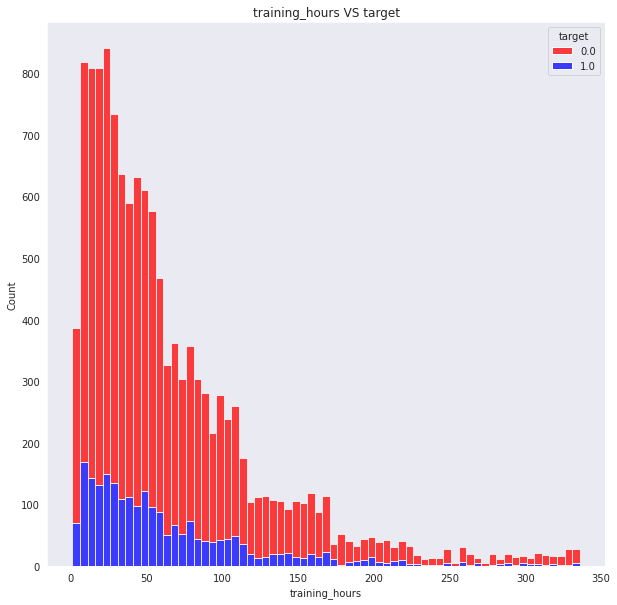

In [14]:
sns.set_style("dark") # to remove the grid.
changed_jobs_hist_plot("training_hours") # Note: This plot is stack plot.

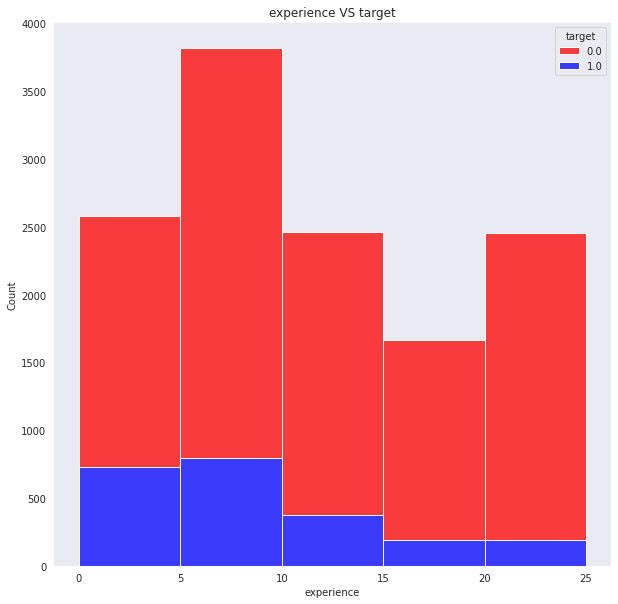

In [15]:
sns.set_style("dark") # to remove the grid.
changed_jobs_hist_plot("experience") # Note: This plot is stack plot.

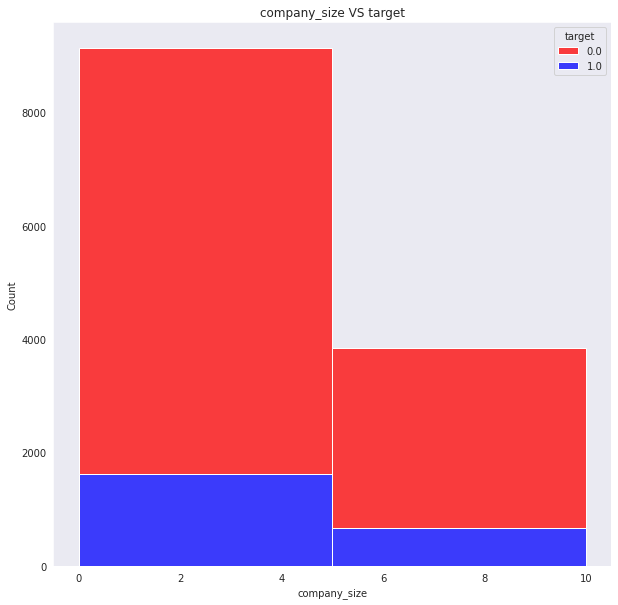

In [16]:
sns.set_style("dark") # to remove the grid.
changed_jobs_hist_plot("company_size") # Note: This plot is stack plot.

# Insights on histographs

* Mainly candidates who invested less training hours were more likely to change jobs after training

* Less experienced candidates more likely to changed jobs 

* Candidates from smaller companies were changing jobs

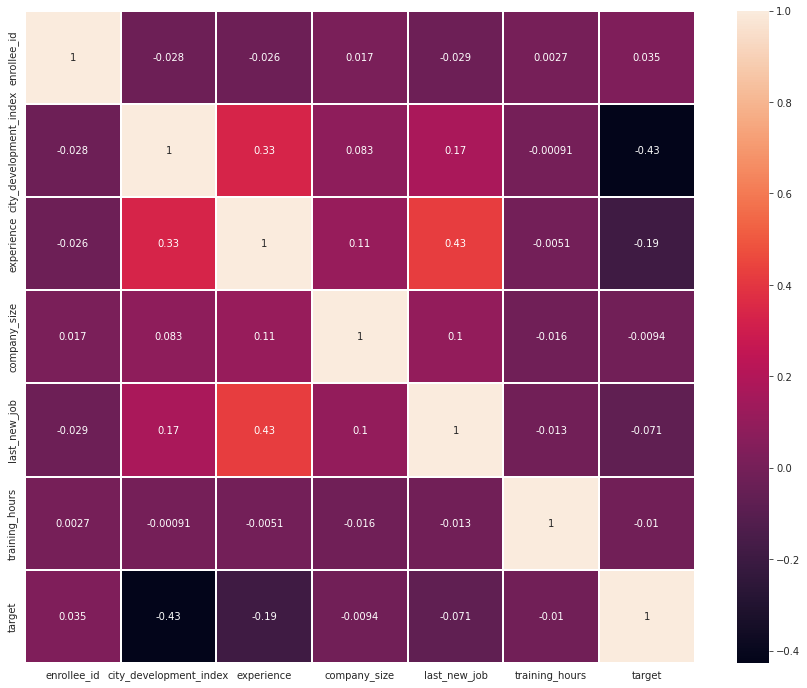

In [17]:
plt.figure(figsize = (15, 12))
correlation = df.corr()
heat_map = sns.heatmap( correlation, linewidth = 1 , annot = True)

# Insights:

* Negative correlation between changing jobs and city development 
* Correlation between target and other features are almost negligible
* Positive correlation between experience and last new job 
* City development and experience are positively correlated 

# 2. Feature Selection and Pre-processing
<ol type="I">
<li>Put all the data from the dataframe into X, except the enrolle_id and the target columns</li>
<li>Perform feature scaling on the data of X with StandardScaler and show some sample data from X after scaling (Use the technique shown in the second answer from this post: https://stackoverflow.com/questions/44552031/sklearnstandardscaler-can-i-inverse-the-standardscaler-for-the-model-output (Links to an external site.) </li>


In [18]:
# placeing dataframe data into X 
X = np.array(df[['city_development_index', 'experience', 'company_size', 'last_new_job', 'training_hours']])

In [19]:
# scaling data and showing first data instance
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
print(scaled[0])

[-0.50342203  0.63395707 -0.5747232   1.69076217 -0.30839586]


# 3. KMeans Clustering
<ol type="I">
<li>Import related library for Kmeans and perform Kmeans on X (note that it was scaled already). Make sure to put random_state = 47 (it can be any number, but use 47 so that you will produce almost the same result as us). Use k-means++ for the initial centroids. You should know from the problem description how many clusters we are interested in.</li>
<li>Show the cluster centers as it is and then inverse the scale and show the centers. Please explain in words about the centers relating them to the columns of the data set</li>
<li>Show the distance matrix.</li>
<li>Show the labels</li>
<li>Add a new column to your data frame called cluster_label and assign the cluster label for the instances based on the K-means cluster label</li>
<li>The target column of our data frame is floating-point numbers. So, this number is not comparable with the cluster label. Add a column target_int and write a function or use a strategy to store the int version of the target column into the target_int column (For example, 1.0 in the target will be 1 in the target_int, 0.0 will be 0)</li>
<li>Show the top 5 rows of the dataframe now that shows you have added those two columns and they have the correct values</li>
<li>Now, we would like to compare the cluster label with the ground truth. Print confusion matrix that compares the target_int and the cluster_label, show the classification_report, and then show the total number of misclassification </li>
<li>Discuss the numbers from 3 Viii and any thoughts on it.</li>


In [20]:
from sklearn.cluster import KMeans

In [21]:
# Perform kmeans on scaled dataframe features X
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state = 47)
kmeans.fit(scaled)

KMeans(n_clusters=2, random_state=47)

In [22]:
# cluster centers
kmeans.cluster_centers_

array([[-0.31364817, -0.63941844, -0.15207764, -0.55076921,  0.01170319],
       [ 0.44177356,  0.90062111,  0.21420141,  0.77575864, -0.01648395]])

In [23]:
# Inversed cluster centers
inversed = scaler.inverse_transform(kmeans.cluster_centers_)
print(inversed)

[[ 0.7987756   6.62300698  2.9252866   1.32309922 66.4026881 ]
 [ 0.88943708 16.75426875  3.72717149  3.49907201 64.69413512]]


In [24]:
kmeans.transform(scaled)  #distance matrix

array([[2.6387601 , 1.58409296],
       [2.93535149, 1.74579189],
       [1.3371321 , 2.57904978],
       ...,
       [1.51732572, 2.56222519],
       [2.96221279, 1.14612076],
       [1.2962834 , 2.85511871]])

In [25]:
# labels identified 
identified_clusters = kmeans.fit_predict(scaled)
identified_clusters

array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

In [26]:
# labels identified 
kmeans.labels_ 

array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

In [27]:
# new dataframe column for cluster labels
df['cluster_label'] = kmeans.labels_ 

In [28]:
df.head()

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target,cluster_label
0,29725,0.776,15,2,5,47,0.0,1
1,666,0.767,21,2,4,8,0.0,1
2,28806,0.920,5,2,1,24,0.0,0
3,402,0.762,13,0,5,18,1.0,1
4,27107,0.920,7,2,1,46,1.0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12977 entries, 0 to 12976
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12977 non-null  int64  
 1   city_development_index  12977 non-null  float64
 2   experience              12977 non-null  int64  
 3   company_size            12977 non-null  int64  
 4   last_new_job            12977 non-null  int64  
 5   training_hours          12977 non-null  int64  
 6   target                  12977 non-null  float64
 7   cluster_label           12977 non-null  int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 760.5 KB


In [30]:
# new dataframe column for target to compare to cluster labels
df['target_int'] = df['target']

In [31]:
df.head()

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target,cluster_label,target_int
0,29725,0.776,15,2,5,47,0.0,1,0.0
1,666,0.767,21,2,4,8,0.0,1,0.0
2,28806,0.920,5,2,1,24,0.0,0,0.0
3,402,0.762,13,0,5,18,1.0,1,1.0
4,27107,0.920,7,2,1,46,1.0,0,1.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12977 entries, 0 to 12976
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12977 non-null  int64  
 1   city_development_index  12977 non-null  float64
 2   experience              12977 non-null  int64  
 3   company_size            12977 non-null  int64  
 4   last_new_job            12977 non-null  int64  
 5   training_hours          12977 non-null  int64  
 6   target                  12977 non-null  float64
 7   cluster_label           12977 non-null  int32  
 8   target_int              12977 non-null  float64
dtypes: float64(3), int32(1), int64(5)
memory usage: 861.9 KB


In [33]:
# changing column to int64 though it doesnt affect anything
df["cluster_label"] = df["cluster_label"].apply(np.int64)

In [34]:
# changing column to int64 to compare with cluster labels
df["target_int"] = df["target_int"].apply(np.int64)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12977 entries, 0 to 12976
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12977 non-null  int64  
 1   city_development_index  12977 non-null  float64
 2   experience              12977 non-null  int64  
 3   company_size            12977 non-null  int64  
 4   last_new_job            12977 non-null  int64  
 5   training_hours          12977 non-null  int64  
 6   target                  12977 non-null  float64
 7   cluster_label           12977 non-null  int64  
 8   target_int              12977 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 912.6 KB


In [36]:
df.head()

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target,cluster_label,target_int
0,29725,0.776,15,2,5,47,0.0,1,0
1,666,0.767,21,2,4,8,0.0,1,0
2,28806,0.920,5,2,1,24,0.0,0,0
3,402,0.762,13,0,5,18,1.0,1,1
4,27107,0.920,7,2,1,46,1.0,0,1


In [37]:
# In this model let the negative class be 0 : Not looking for a job change

# And positive class be 1 :  looking for a job change

#                                      Predicted
#  CM displays as               Negative     Positive
#                    Negative     TN            FP
#       Actual       Positive     FN            TP
CL_cm = confusion_matrix(df['target_int'], df['cluster_label'])
print(f'Cluster Label Confusion Matrix\n {CL_cm}')

Cluster Label Confusion Matrix
 [[5835 4860]
 [1747  535]]


In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(df['target_int'], df['cluster_label']))


              precision    recall  f1-score   support

           0       0.77      0.55      0.64     10695
           1       0.10      0.23      0.14      2282

    accuracy                           0.49     12977
   macro avg       0.43      0.39      0.39     12977
weighted avg       0.65      0.49      0.55     12977



In [40]:
count_misclassified_cluster = (df['target_int'] != df['cluster_label']).sum()
print("Cluster Labels")
print("=" * 30)
print(f'Misclassified samples: {count_misclassified_cluster}')
accuracy = accuracy_score(df['target_int'], df['cluster_label'])
print('Accuracy: {:.2f}'.format(accuracy))

Cluster Labels
Misclassified samples: 6607
Accuracy: 0.49


### Discuss the numbers from 3 Viii and any thoughts on it.
After printing the confusion matrix and the classification report

* The kmeans model does not peform well enough with the data since the accuracy score  is less than 50 %, so the data is not being explained well. 

* There are low F1, precision, and recall scores for both the negative and positive class

* Noticed that there are more misclassified samples than true negatives or positives.

In [41]:
kmeans.inertia_

49643.86379769514

### What is the elbow method and what is its purpose of it in the case of KMeans clustering?

The Elbow method is a very popular technique and the idea is to run k-means clustering for a range of clusters k (let’s say from 1 to 10) and for each value, we are calculating the sum of squared distances or wcss from each point to its assigned center.

Text(0, 0.5, 'WCSS')

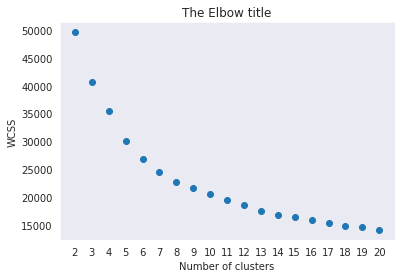

In [42]:
wcss=[]
for i in range(2,21):
  kmeans_new = KMeans(i, init = "k-means++", random_state = 47)
  kmeans_new.fit(scaled)
  wcss_iter = kmeans_new.inertia_
  wcss.append(wcss_iter)


number_clusters = range(2,21)
plt.scatter(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(2, 21, step=1))
plt.ylabel('WCSS')

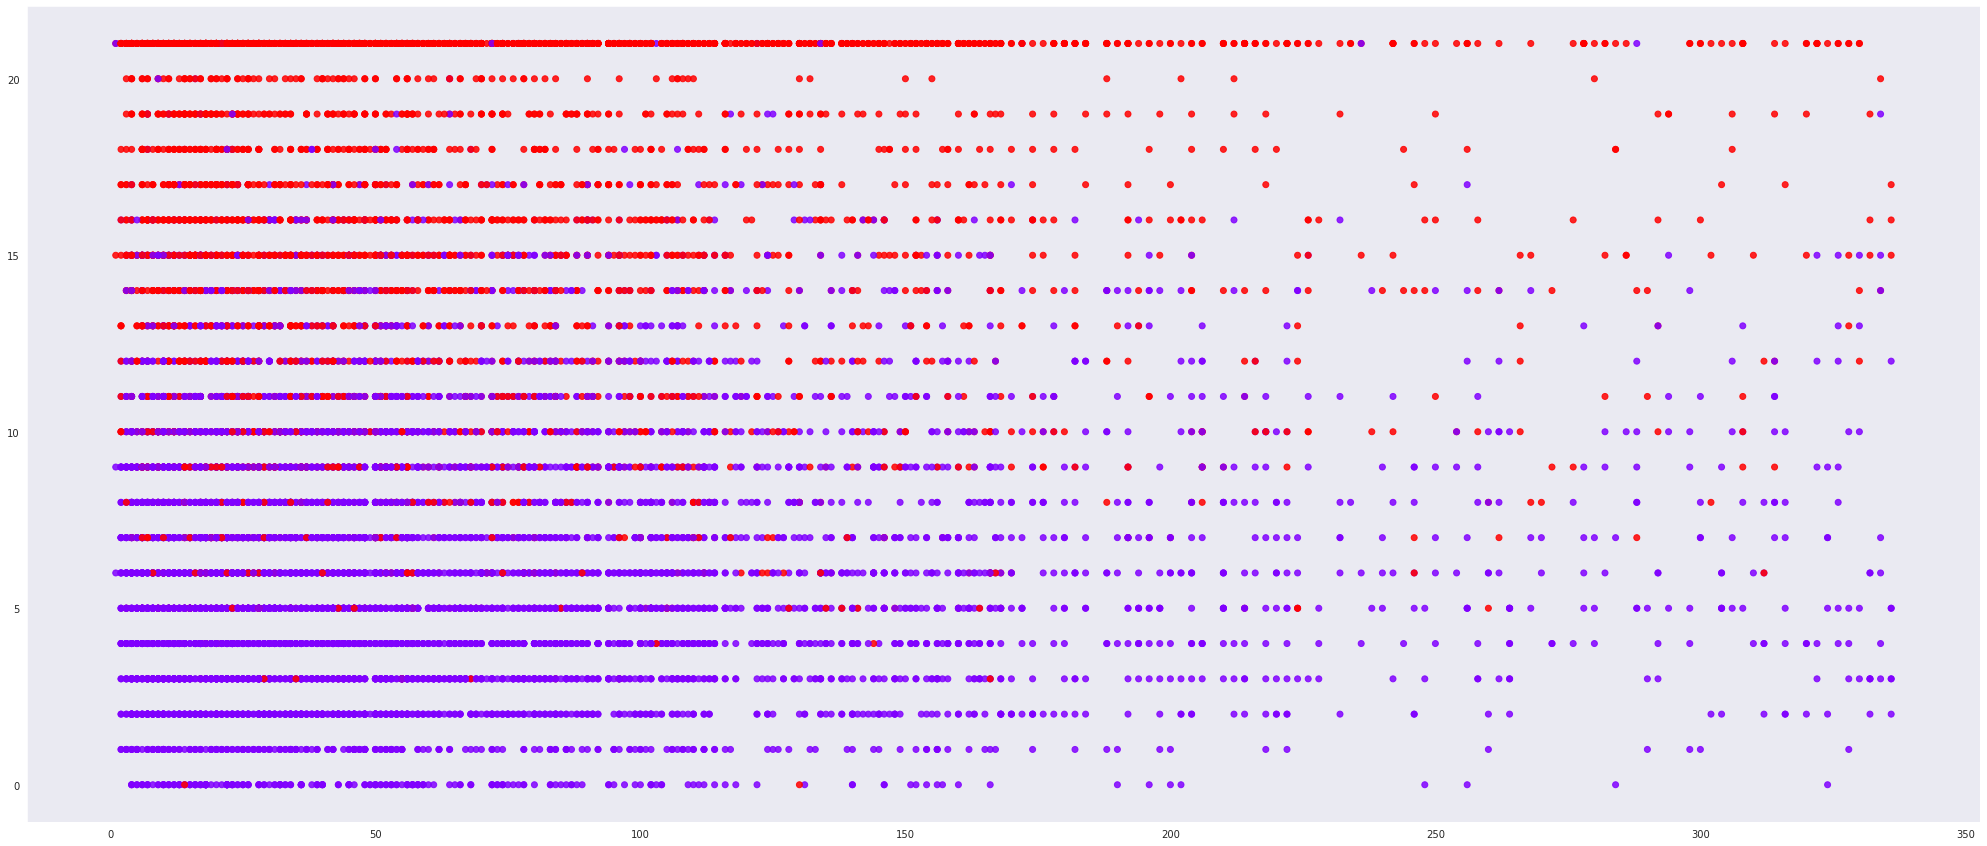

In [43]:
plt.figure(figsize=(35, 15))  
plt.scatter(df['training_hours'],df['experience'], c=df['cluster_label'], alpha = 0.85, cmap='rainbow')

### Write any thoughts on this plot.
My first thought is that we can clearly see two clusters being formed between training hours and experience. 

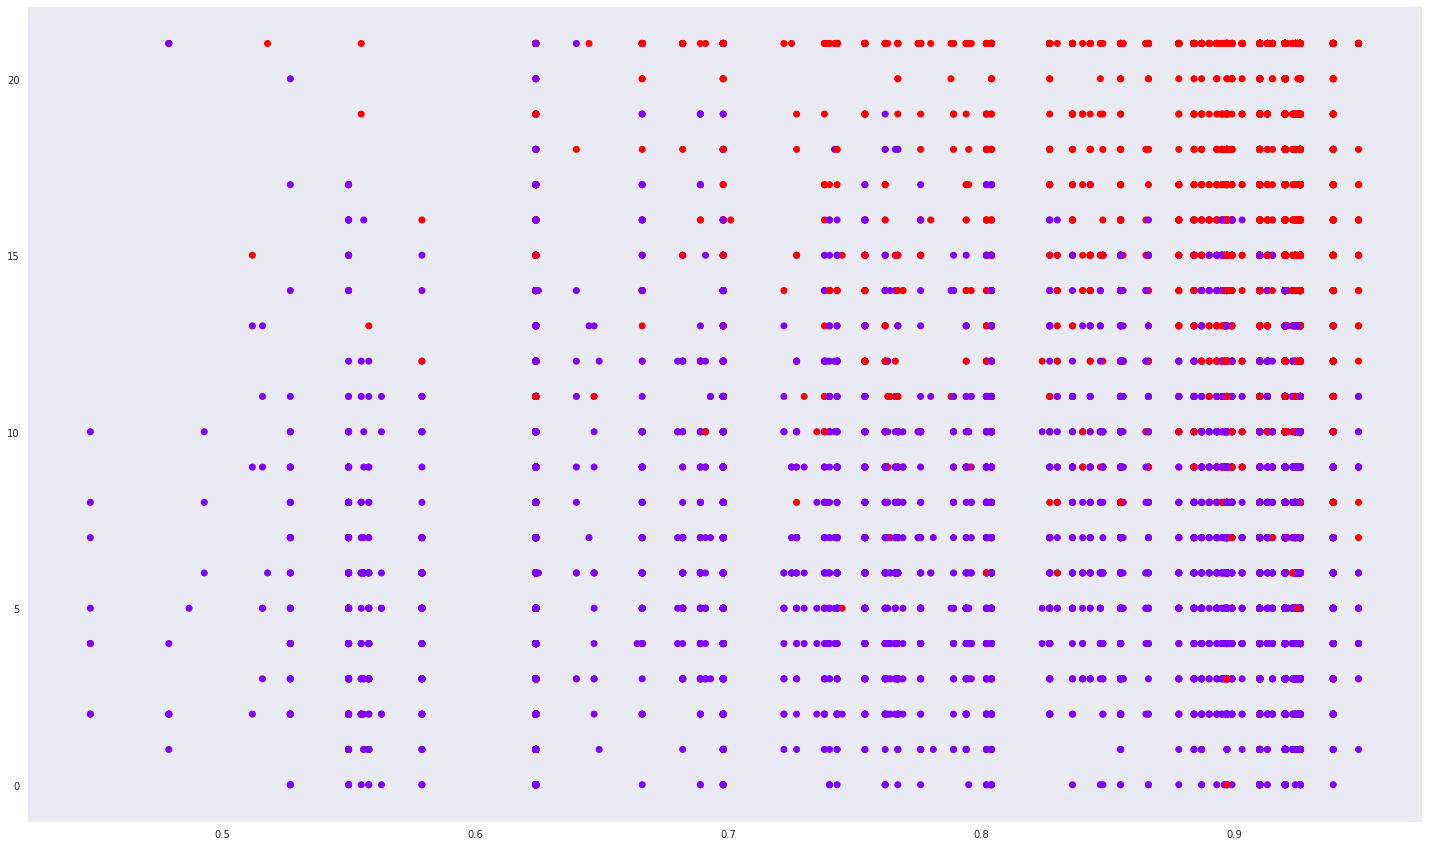

In [44]:
plt.figure(figsize=(25, 15))  
plt.scatter(df['city_development_index'],df['experience'], c=df['cluster_label'], cmap='rainbow')

### Write any thoughts on this plot.
My first thought is that we can clearly see two clusters being formed between last new job and company size. 

In [53]:
scaled_df = pd.DataFrame(scaled, columns = ['city_development_index', 'experience', 'company_size', 'last_new_job', 'training_hours'])
scaled_df['cluster_label'] = df['cluster_label']
scaled_df['target_int'] = df['target_int']
scaled_df['target'] = df['target']

In [55]:
scaled_df.head()

,city_development_index,experience,company_size,last_new_job,training_hours,cluster_label,target_int,target
0,-0.503422,0.633957,-0.574723,1.690762,-0.308396,1,0,0.0
1,-0.578413,1.546009,-0.574723,1.081137,-0.951805,1,0,0.0
2,0.696434,-0.886130,-0.574723,-0.747739,-0.687842,0,0,0.0
3,-0.620075,0.329940,-1.488268,1.690762,-0.786828,1,1,1.0
4,0.696434,-0.582112,-0.574723,-0.747739,-0.324894,0,1,1.0


In [45]:
from scipy.cluster.hierarchy import dendrogram

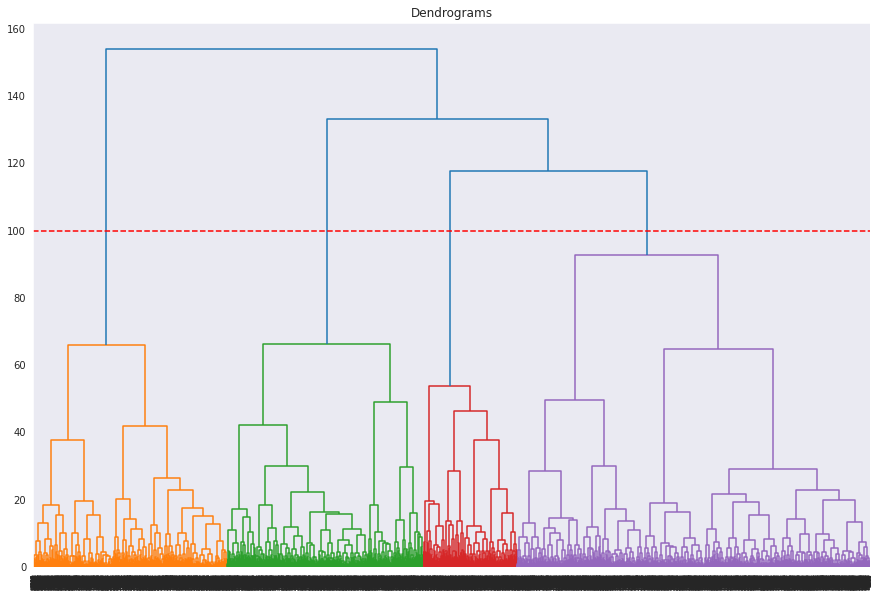

In [60]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled, method='ward'))
plt.axhline(y=100, color='r', linestyle='--')

In [56]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(scaled)

array([1, 1, 0, ..., 0, 1, 0])

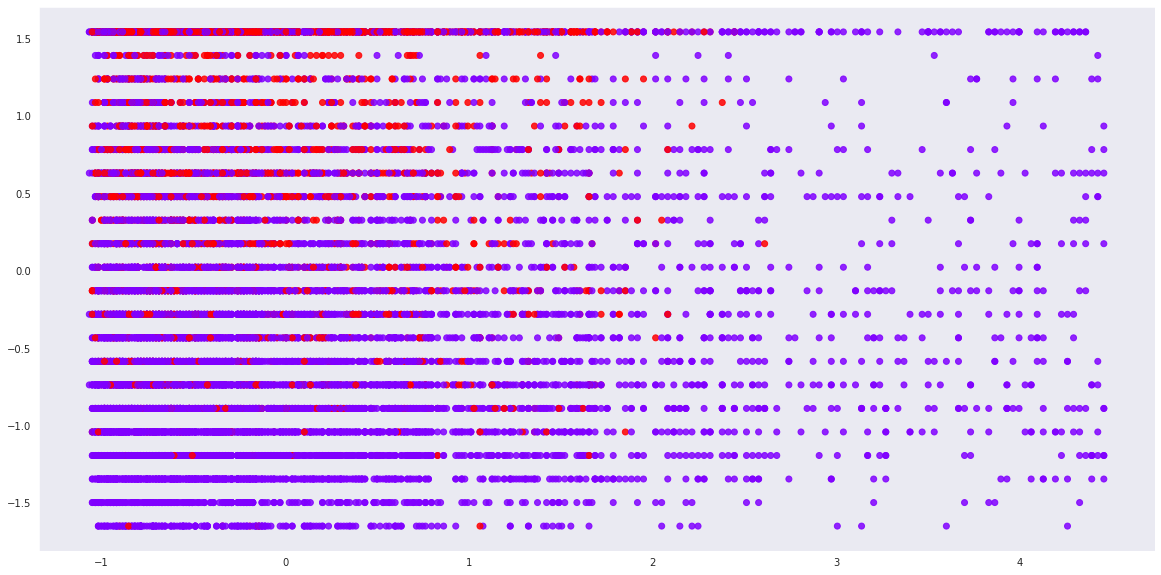

In [57]:
plt.figure(figsize=(20, 10))  
plt.scatter(scaled_df['training_hours'], scaled_df['experience'], c=cluster.labels_, alpha = 0.85, cmap='rainbow') 

### Discuss if anything interesting
I can clearly see two distinct clusters being formed between training hours and experience.

In [58]:
cluster_5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster_5.fit_predict(scaled)

array([1, 1, 2, ..., 2, 1, 2])

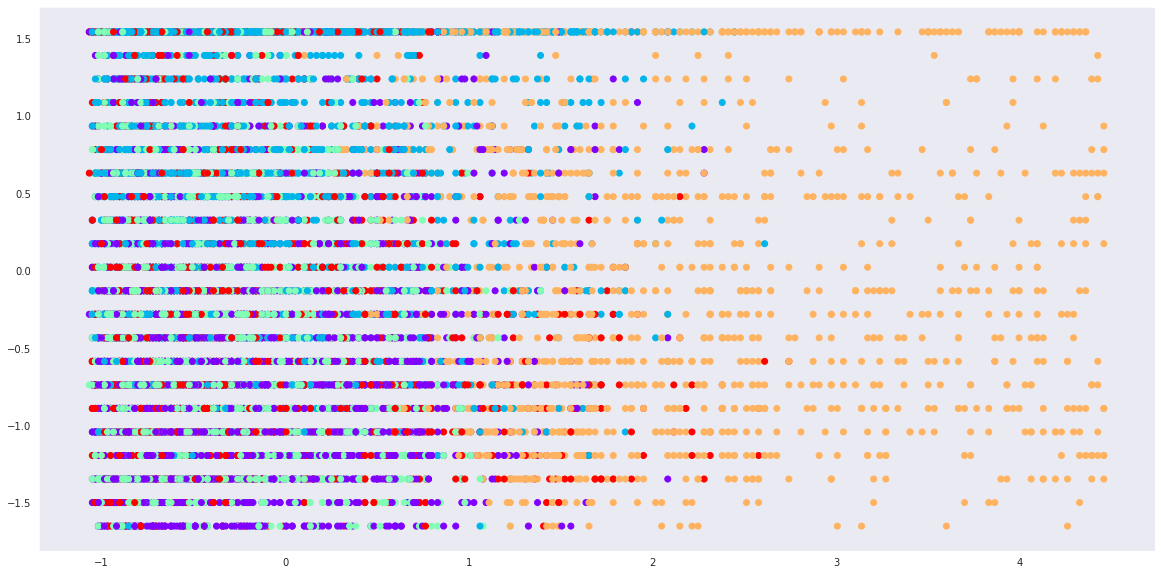

In [59]:
plt.figure(figsize=(20, 10))  
plt.scatter(scaled_df['training_hours'], scaled_df['experience'], c=cluster_5.labels_, cmap='rainbow') 

### Discuss if anything interesting
I can clearly see mulitple distinct clusters being formed between training hours and experience.